In [114]:
## this block is only for function definitions

import subprocess
import matplotlib.pyplot as plt

def fibonacci(size, unit):
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 fibonacci/fibonacci.c -o classes/fibonacci.out
	# classes/fibonacci.out <size>
	subprocess.run(['gcc', '-O0', 'fibonacci/fibonacci.c', '-o', 'classes/fibonacci.out'])
	fib_c = int(subprocess.run(['classes/fibonacci.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(fib_c / units[unit])
	# Java
	# javac -d classes fibonacci/fibonacci.java
	# java -cp classes fibonacci <size>
	subprocess.run(['javac', '-d', 'classes', 'fibonacci/fibonacci.java'])
	fib_java = int(subprocess.run(['java', '-cp', 'classes', 'fibonacci', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(fib_java / units[unit])
	# Python
	# python3 fibonacci/fibonacci.py <size>
	fib_py = int(subprocess.run(['python3', 'fibonacci/fibonacci.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(fib_py / units[unit])
	return runtimes

def selection(size, unit): # sorts an array of size n where array[0] = n, array[n] = 0
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 selection/Selection.c -o classes/selection.out
	# classes/selection.out <size>
	subprocess.run(['gcc', '-O0', 'selection/Selection.c', '-o', 'classes/selection.out'])
	sel_c = int(subprocess.run(['classes/selection.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(sel_c / units[unit])
	# Java
	# javac -d classes selection/Selection.java
	# java -cp classes Selection <size>
	subprocess.run(['javac', '-d', 'classes', 'selection/Selection.java'])
	sel_java = int(subprocess.run(['java', '-cp', 'classes', 'Selection', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(sel_java / units[unit])
	# Python
	# python3 selection/Selection.py <size>
	sel_py = int(subprocess.run(['python3', 'selection/Selection.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(sel_py / units[unit])
	return runtimes

def sum(size, unit): # each program returns time in µs
	# sum a list with each index value = its key
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 sum/sum.c -o classes/sum.out
	# classes/sum.out <size>
	subprocess.run(['gcc', '-O0', 'sum/sum.c', '-o', 'classes/sum.out'])
	sum_c = int(subprocess.run(['classes/sum.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(sum_c / units[unit])
	# Java
	# javac -d classes sum/Sum.java
	# java -cp classes Sum <size>
	subprocess.run(['javac', '-d', 'classes', 'sum/Sum.java'])
	sum_java = int(subprocess.run(['java', '-cp', 'classes', 'Sum', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(sum_java / units[unit])
	# Python
	# python3 sum/sum.py <size>
	sum_py = int(subprocess.run(['python3', 'sum/sum.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(sum_py / units[unit])
	return runtimes

def matrixmult(size, unit): # each program returns time in µs
	# sum 2 2D matrices with index value equal to adding keys
	runtimes = {'size':size}
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 matrixmult/MatrixMult.c -o classes/MatrixMult.out
	# classes/MatrixMult.out <size>
	subprocess.run(['gcc', '-O0', 'matrixmult/MatrixMult.c', '-o', 'classes/MatrixMult.out'])
	matrmult_c = int(subprocess.run(['classes/MatrixMult.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(matrmult_c / units[unit])
	# Java
	# javac -d classes matrixmult/MatrixMult.java
	# java -cp classes MatrixMult <size>
	subprocess.run(['javac', '-d', 'classes', 'matrixmult/MatrixMult.java'])
	matrmult_java = int(subprocess.run(['java', '-cp', 'classes', 'MatrixMult', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(matrmult_java / units[unit])
	# Python
	# python3 matrixmult/MatrixMult.py
	matrmult_py = int(subprocess.run(['python3', 'matrixmult/MatrixMult.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(matrmult_py / units[unit])
	# graph
	return runtimes
	

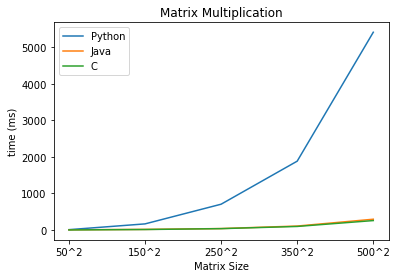

In [126]:
def graph_matrix_mult():
	unit='ms'
	matrix_mult = {'50^2' :matrixmult(size='50', unit=unit),
				   #'100^2':matrixmult(size='100',unit=unit),
				   '150^2':matrixmult(size='150',unit=unit),
				   #'200^2':matrixmult(size='200',unit=unit),
				   '250^2':matrixmult(size='250',unit=unit),
				   #'300^2':matrixmult(size='300',unit=unit),
				   '350^2':matrixmult(size='350',unit=unit),
				   #'400^2':matrixmult(size='400',unit=unit),
				   #'450^2':matrixmult(size='450',unit=unit),
				   '500^2':matrixmult(size='500',unit=unit)}
	c, py, java = list(), list(), list()
	for value in matrix_mult.values():
		c.append(value['C'])
		py.append(value['Python'])
		java.append(value['Java'])
	plt.title('Matrix Multiplication')
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'Matrix Size')
	plt.plot(matrix_mult.keys(), py, label='Python')
	plt.plot(matrix_mult.keys(), java, label='Java')
	plt.plot(matrix_mult.keys(), c, label='C')
	plt.legend()
	plt.show()
graph_matrix_mult()

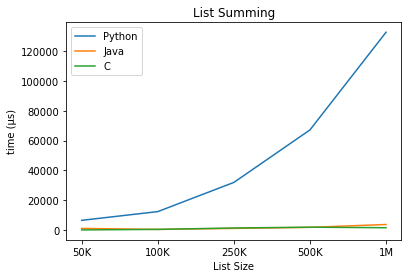

In [102]:
def graph_sum():
	unit = 'µs'
	#unit = 'ms'
	# max = '1 000 000'
	sums = {'50K' :sum(size='50000'  ,unit=unit),
			'100K':sum(size='100000' ,unit=unit),
			'250K':sum(size='250000' ,unit=unit),
			'500K':sum(size='500000' ,unit=unit),
			'1M'  :sum(size='1000000',unit=unit)}
	c, py, java = list(), list(), list()
	for value in sums.values():
		c.append(value['C'])
		py.append(value['Python'])
		java.append(value['Java'])
	plt.title('List Summing')
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'List Size')
	plt.plot(sums.keys(), py, label='Python')
	plt.plot(sums.keys(), java, label='Java')
	plt.plot(sums.keys(), c, label='C')
	plt.legend()
	#plt.yscale('log')
	plt.show()
graph_sum()

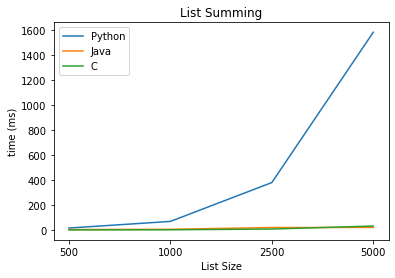

In [121]:
def graph_sel():
	#unit = 'µs'
	unit = 'ms'
	sels = {'500' :selection(size='500' ,unit=unit),
			'1000':selection(size='1000',unit=unit),
			'2500':selection(size='2500',unit=unit),
			'5000':selection(size='5000',unit=unit)}
			#'5':selection(size='10000',unit=unit)}
	c, py, java = list(), list(), list()
	for value in sels.values():
		c.append(value['C'])
		py.append(value['Python'])
		java.append(value['Java'])
	plt.title('List Summing')
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'List Size')
	plt.plot(sels.keys(), py, label='Python')
	plt.plot(sels.keys(), java, label='Java')
	plt.plot(sels.keys(), c, label='C')
	plt.legend()
	#plt.yscale('log')
	plt.show()
graph_sel()

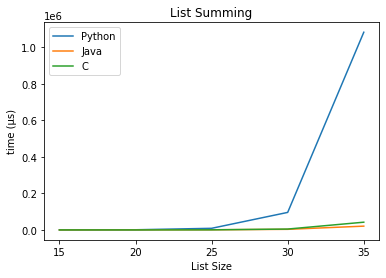

In [128]:
def graph_fib():
	unit = 'µs'
	#unit = 'ms'
	fibs = {'15':fibonacci(size='15',unit=unit),
			'20':fibonacci(size='20',unit=unit),
			'25':fibonacci(size='25',unit=unit),
			'30':fibonacci(size='30',unit=unit),
			'35':fibonacci(size='35',unit=unit)}
			#'5':selection(size='10000',unit=unit)}
	c, py, java = list(), list(), list()
	for value in fibs.values():
		c.append(value['C'])
		py.append(value['Python'])
		java.append(value['Java'])
	plt.title('List Summing')
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'List Size')
	plt.plot(fibs.keys(), py, label='Python')
	plt.plot(fibs.keys(), java, label='Java')
	plt.plot(fibs.keys(), c, label='C')
	plt.legend()
	#plt.yscale('log')
	plt.show()
graph_fib()